In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("D:\\pyt\\Assignment\\Assignment 6-Logistic Regression\\bank-full.csv",sep=";")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df=df.dropna()

In [5]:
df.shape

(45211, 17)

In [6]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

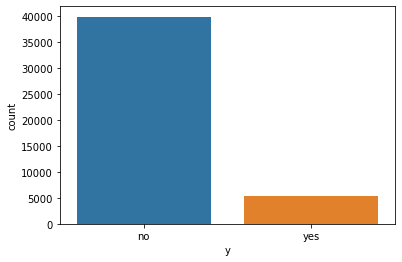

In [8]:
sns.countplot(x="y", data=df)

In [9]:
data1 = df[df['y'] == 'yes']
data2 = df[df['y'] == 'no']

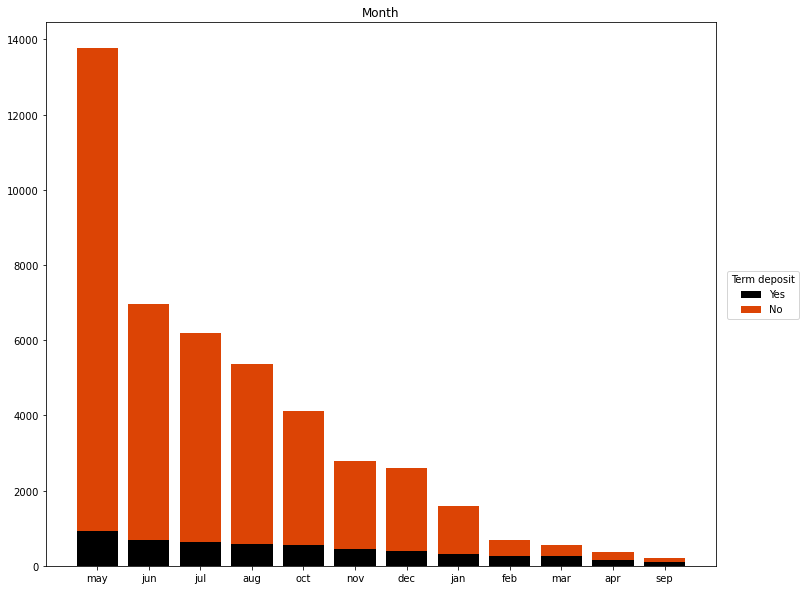

In [10]:
fig, ax= plt.subplots( figsize=(12,10))
ax.bar(data1['month'].unique(),height = data1['month'].value_counts(),color='#000000')
ax.bar(data2['month'].unique(),height = data2['month'].value_counts(),bottom = data1['month'].value_counts(),color = '#DC4405') 
ax.title.set_text("Month")
plt.figlegend( ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

In [11]:
predictors = df.iloc[:,0:16]
predictors = predictors.drop(['pdays'],axis=1)
y = df.iloc[:,16]
x = pd.get_dummies(predictors)

In [12]:
x.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [16]:
model = LogisticRegression(random_state=0,multi_class='auto',max_iter=3000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [17]:
y_pred=model.predict(x_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[7837,  188],
       [ 667,  351]], dtype=int64)

In [19]:
accuracy_score(y_test, y_pred)

0.9054517306203693

In [20]:
model.score(x_test, y_test)

0.9054517306203693

In [21]:
from sklearn.preprocessing import  label_binarize

In [22]:
y_test = label_binarize(y_test,classes=['no','yes'])
y_pred = label_binarize(y_pred,classes=['no','yes'])
precision_score(y_test, y_pred) 

0.6512059369202227

In [23]:
recall_score(y_test, y_pred)

0.34479371316306484

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8025
           1       0.65      0.34      0.45      1018

    accuracy                           0.91      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.91      0.89      9043



In [25]:
fpr1, tpr1, _=roc_curve(y_test, y_pred)


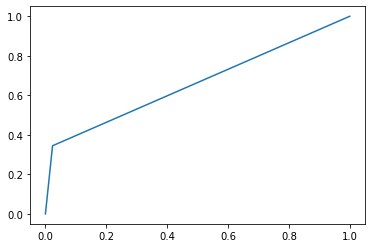

In [26]:
plt.plot(fpr1, tpr1)

In [27]:
auc(fpr1, tpr1)

0.6606834609429031

# This given data is unbalanced as number of "no" are higher than number of "yes" in the given data set, so its requierd to equalize the number.Handling Imbalanced data by random over sampling

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [29]:
ros= RandomOverSampler()

In [30]:
x_resampled, y_resampled=ros.fit_resample(x_train, y_train)

In [31]:
y_resampled.value_counts()

yes    31897
no     31897
Name: y, dtype: int64

In [32]:
model_sampled= LogisticRegression(random_state=0,multi_class='auto',max_iter=3000)

In [33]:
model_sampled.fit(x_resampled, y_resampled )

LogisticRegression(max_iter=3000, random_state=0)

In [34]:
predicted= model_sampled.predict(x_test)

In [35]:
predicted=label_binarize(predicted,classes=['no','yes'])

In [36]:
accuracy_score(y_test, predicted)

0.8452947030852593

In [37]:
recall_score(y_test, predicted)

0.8074656188605108

In [38]:
precision_score(y_test, predicted)

0.4059259259259259

In [39]:
fpr, tpr, _=roc_curve(y_test, predicted)

In [40]:
auc(fpr, tpr)

0.8287795384022181

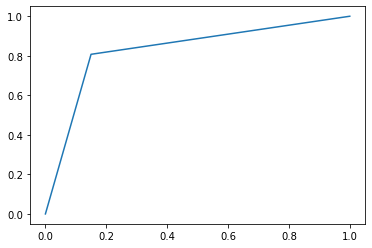

In [41]:
plt.plot(fpr, tpr)

In [42]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      8025
           1       0.41      0.81      0.54      1018

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.91      0.85      0.87      9043



In [43]:
confusion_matrix(y_test, predicted)

array([[6822, 1203],
       [ 196,  822]], dtype=int64)

# It can be seen that after handling imbanced data by random oversampling the area under the curve has been impoved

# Using SMOTE ( Synthetic Minority Oversampling Technique)

In [45]:
somte=SMOTE()

In [51]:
x_som, y_som= somte.fit_resample(x_train, y_train)

In [53]:
y_som.value_counts()

yes    31897
no     31897
Name: y, dtype: int64

In [60]:
som_model= LogisticRegression(random_state=0,multi_class='auto',max_iter=10000)

In [61]:
som_model.fit(x_som, y_som)

LogisticRegression(max_iter=10000, random_state=0)

In [73]:
som_pred=som_model.predict(x_test)

In [74]:
som_pred=label_binarize(som_pred,classes=['no','yes'])

In [75]:
print(classification_report(y_test, som_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8025
           1       0.64      0.37      0.47      1018

    accuracy                           0.91      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.89      0.91      0.89      9043



# using random undersampling

In [113]:
from imblearn.under_sampling import RandomUnderSampler

In [114]:
under_sampling= RandomUnderSampler()

In [115]:
x_unsamp, y_unsamp=under_sampling.fit_resample(x_train, y_train)

In [116]:
y_unsamp.value_counts()

yes    4271
no     4271
Name: y, dtype: int64

In [117]:
model_undersamp= LogisticRegression(random_state=40, max_iter=5000)

In [118]:
model_undersamp.fit(x_unsamp, y_unsamp)

LogisticRegression(max_iter=5000, random_state=40)

In [119]:
pred_undersampled=model_undersamp.predict(x_test)

In [120]:
pred_undersampled=label_binarize(pred_undersampled, classes=["no", "yes"])

In [121]:
print(classification_report(y_test,pred_undersampled))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8025
           1       0.40      0.81      0.53      1018

    accuracy                           0.84      9043
   macro avg       0.68      0.83      0.72      9043
weighted avg       0.91      0.84      0.86      9043



In [122]:
y_test=pd.DataFrame(y_test)

In [123]:
y_test.value_counts()

0    8025
1    1018
dtype: int64